In [81]:
# Some preliminary styling

from IPython.display import HTML

HTML("""
<style>
    @import url('https://fonts.googleapis.com/css2?family=Roboto&display=swap');
    body{font-family: "Roboto"}
    h1{text-align: center;}
    .output_png {display: table-cell; text-align: center; vertical-align: middle; 
    }
</style>""")

# ANALYSIS OF FIFA WORLD CUP DATA

The FIFA World Cup is a global football competition contested by the various football-playing nations of the world. It is contested every four years and is the most prestigious and important trophy in football, otherwise known as Soccer.

In this notebook, we will import, clean, explore, analyze, and visualize FIFA World Cup data from 1930 to 2014, to understand trends, and to answer some questions. We will use `Pandas` and `Numpy` to analyze the data and `Seaborn` and `Matplotlib` for the visualization.

This notebook will also serve to hone my skills in Data Analysis after a six-week course which I took on [Jovian](https://jovian.ml/learn/data-analysis-with-python-zero-to-pandas). 

## Getting the Dataset

For this analysis, we got the dataset from Kaggle, the [FIFA World Cup](https://www.kaggle.com/abecklas/fifa-world-cup) dataset. The World Cup dataset shows all information about all the World Cups from 1930 to 2014, while the World Cup Matches dataset shows all the results from the matches contested as part of the cups. There is also a third dataset that contains the players' data.

You can download the dataset from [here](https://www.kaggle.com/abecklas/fifa-world-cup). I did this project offline on my computer using Jupyter Notebook. You can use any other solution. There are a few online like [Jovian](https://jovian.ai/), [Kaggle](https://www.kaggle.com/), [Google Colab](https://colab.research.google.com/), etc.

In [2]:
data_dir = '.'
import os
os.listdir(data_dir)

['.ipynb_checkpoints',
 '.jovianrc',
 'fifa-world-cup-analysis.ipynb',
 'WorldCupMatches.csv',
 'WorldCupPlayers.csv',
 'WorldCups.csv']

Let us save and upload our work to Jovian before continuing. We will do this whenever we complete a section.

In [3]:
project_name = "fifa-world-cup-analysis" 

In [4]:
!pip install jovian --upgrade -q

In [5]:
import jovian

In [6]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Updating notebook "djotchuang/fifa-world-cup-analysis" on https://jovian.ai/
[jovian] Committed successfully! https://jovian.ai/djotchuang/fifa-world-cup-analysis


'https://jovian.ai/djotchuang/fifa-world-cup-analysis'

## Data Preparation and Cleaning

Preparing and cleaning the data will make it less tedious for us to analyze it. In this step, we want to handle missing, invalid, and inconsistent values. We would also drop columns where necessary, and create new ones which we may need.

> Here's what we'll do:
>
> - Load all 3 datasets into Pandas Dataframes, and explore relationships.
> - Handle missing, incorrect and invalid data
> - Perform any additional steps (parsing dates, creating additional columns, deleting useless columns, merging multiple datasets, etc.)

In [7]:
# All imports will go here

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

In [8]:
# Worldcup Data - General Info

worldcup_data = pd.read_csv('WorldCups.csv')

worldcup_data.tail()

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
15,1998,France,France,Brazil,Croatia,Netherlands,171,32,64,2.785.100
16,2002,Korea/Japan,Brazil,Germany,Turkey,Korea Republic,161,32,64,2.705.197
17,2006,Germany,Italy,France,Germany,Portugal,147,32,64,3.359.439
18,2010,South Africa,Spain,Netherlands,Germany,Uruguay,145,32,64,3.178.856
19,2014,Brazil,Germany,Argentina,Netherlands,Brazil,171,32,64,3.386.810


The data looks correct, however, we may need to remove the '.' in the Attendance values.

In [9]:
worldcup_data['Attendance'] = worldcup_data['Attendance'].str.replace(".", "", regex=False)

worldcup_data.tail()

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
15,1998,France,France,Brazil,Croatia,Netherlands,171,32,64,2785100
16,2002,Korea/Japan,Brazil,Germany,Turkey,Korea Republic,161,32,64,2705197
17,2006,Germany,Italy,France,Germany,Portugal,147,32,64,3359439
18,2010,South Africa,Spain,Netherlands,Germany,Uruguay,145,32,64,3178856
19,2014,Brazil,Germany,Argentina,Netherlands,Brazil,171,32,64,3386810


> **Here's what the column headers represent:**
>
> Year: Year of the worldcup <br />
> Country: Host Country <br />
> Winner: The team that won the worldcup <br />
> RunnersUp: The team was second place <br />
> Third: The team that was third place <br />
> Fourth: The team that was forth place <br />
> GoalsScored: Total number of goals scored during the world cup <br />
> QualifiedTeams: Total number of teams that qualified for the world cup <br />
> MatchesPlayed: Total number of matches played during the worldcup <br />
> Attendance: Total Total crowd present during the worldcup <br />

In [10]:
# Data on the Matches

worldcup_matches = pd.read_csv('WorldCupMatches.csv')

worldcup_matches.head()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA


> **Here's what the column headers represent:**
>
> Year: Year of the worldcup <br />
> Datetime: The Date on which the match was played along with a 24 hour format time <br />
> Stage: The stage at which the match was played <br />
> Stadium: Stadium name where the match was held <br />
> City: The city name, where the match was played <br />
> Home Team Name: Home team country name	<br />
> Home Team Goals: Total goals scored by the home team by the end of the match	<br />
> Away Team Goals: Total goals scored by the away team by the end of the match	<br />
> Away Team Name: Away team country name	<br />
> Win conditions: Special win condition (if any)	<br />
> Attendance: Total crowd present at the satdium	<br />
> Half-time Home Goals: Goals scored by the home team until half time	<br />
> Half-time Away Goals: Goals scored by the away team until half time	<br />
> Referee: Name of the first refree	<br />
> Assistant 1: Name of the first assistant referee (linesman)	<br />
> Assistant 2: Name of the second assistant referee (linesman)	<br />
> RoundID: Unique ID of the Round	<br />
> MatchID: Unique ID of the match 	<br />
> Home Team Initials: Home team country's three letter initials	<br />
> Away Team Initials: Away team country's three letter initials <br />

In [11]:
# Data on the players

worldcup_players = pd.read_csv('WorldCupPlayers.csv')

worldcup_players.head()

,RoundID,MatchID,Team Initials,Coach Name,Line-up,Shirt Number,Player Name,Position,Event
0,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Alex THEPOT,GK,NaN
1,201,1096,MEX,LUQUE Juan (MEX),S,0,Oscar BONFIGLIO,GK,NaN
2,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Marcel LANGILLER,NaN,G40'
3,201,1096,MEX,LUQUE Juan (MEX),S,0,Juan CARRENO,NaN,G70'
4,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Ernest LIBERATI,NaN,NaN


> **Here's what the column headers represent:**
>
> RoundID: Unique ID of the round <br /> 
> MatchID: Unique ID of the match <br />
> Team Initials: Player's team initials <br />
> Coach Name: Name and country of the team coach <br />
> Line-up: S=Line-up, N=Substitute <br />
> Shirt Number: Shirt number if available  <br />
> Player Name: Name of the player <br />
> Position: C=Captain, GK=Goalkeeper <br />
> Event: G=Goal, OG=Own Goal, Y=Yellow Card, R=Red Card, SY = Red Card by second yellow, P=Penalty, MP=Missed Penalty, I = Substitution In,  <br />

Let us work on the Matches dataframe. If we view the bottom values using `worldcup_matches.tail()`, we'll see that this dataframe has too many NaN values. We want to only get the rows which have valid entries. Now, the question is, how many of them are there? Let us see...

In [12]:
worldcup_matches[~worldcup_matches['Year'].isna()]

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
847,2014.0,05 Jul 2014 - 17:00,Quarter-finals,Arena Fonte Nova,Salvador,Netherlands,0.0,0.0,Costa Rica,Netherlands win on penalties (4 - 3),51179.0,0.0,0.0,Ravshan IRMATOV (UZB),RASULOV Abduxamidullo (UZB),KOCHKAROV Bakhadyr (KGZ),255953.0,300186488.0,NED,CRC
848,2014.0,08 Jul 2014 - 17:00,Semi-finals,Estadio Mineirao,Belo Horizonte,Brazil,1.0,7.0,Germany,,58141.0,0.0,5.0,RODRIGUEZ Marco (MEX),TORRENTERA Marvin (MEX),QUINTERO Marcos (MEX),255955.0,300186474.0,BRA,GER
849,2014.0,09 Jul 2014 - 17:00,Semi-finals,Arena de Sao Paulo,Sao Paulo,Netherlands,0.0,0.0,Argentina,Argentina win on penalties (2 - 4),63267.0,0.0,0.0,C�neyt �AKIR (TUR),DURAN Bahattin (TUR),ONGUN Tarik (TUR),255955.0,300186490.0,NED,ARG
850,2014.0,12 Jul 2014 - 17:00,Play-off for third place,Estadio Nacional,Brasilia,Brazil,0.0,3.0,Netherlands,,68034.0,0.0,2.0,HAIMOUDI Djamel (ALG),ACHIK Redouane (MAR),ETCHIALI Abdelhak (ALG),255957.0,300186502.0,BRA,NED


There are 852 rows of valid data out of about 4572, it is unsure why most of the data comprises NaN values. Well, for our analysis, we will drop these values.

**TODO** 
- Obtain only rows with valid Year values
- Convert _Year_, _MatchID_ from float to int 
- Check for duplicate entries, if any, and drop them
- Split the DateTime column into Date and Time
- Create new columns with already existing ones
- Drop columns which are not needed

In [13]:
# Get valid year values and convert the year, matchid and roundid into int

worldcup_matches_data = worldcup_matches[~worldcup_matches['Year'].isna()].astype({'Year': 'int64',
                                                                                   'MatchID': 'int64'})

worldcup_matches_data.tail()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
847,2014,05 Jul 2014 - 17:00,Quarter-finals,Arena Fonte Nova,Salvador,Netherlands,0.0,0.0,Costa Rica,Netherlands win on penalties (4 - 3),51179.0,0.0,0.0,Ravshan IRMATOV (UZB),RASULOV Abduxamidullo (UZB),KOCHKAROV Bakhadyr (KGZ),255953.0,300186488,NED,CRC
848,2014,08 Jul 2014 - 17:00,Semi-finals,Estadio Mineirao,Belo Horizonte,Brazil,1.0,7.0,Germany,,58141.0,0.0,5.0,RODRIGUEZ Marco (MEX),TORRENTERA Marvin (MEX),QUINTERO Marcos (MEX),255955.0,300186474,BRA,GER
849,2014,09 Jul 2014 - 17:00,Semi-finals,Arena de Sao Paulo,Sao Paulo,Netherlands,0.0,0.0,Argentina,Argentina win on penalties (2 - 4),63267.0,0.0,0.0,C�neyt �AKIR (TUR),DURAN Bahattin (TUR),ONGUN Tarik (TUR),255955.0,300186490,NED,ARG
850,2014,12 Jul 2014 - 17:00,Play-off for third place,Estadio Nacional,Brasilia,Brazil,0.0,3.0,Netherlands,,68034.0,0.0,2.0,HAIMOUDI Djamel (ALG),ACHIK Redouane (MAR),ETCHIALI Abdelhak (ALG),255957.0,300186502,BRA,NED
851,2014,13 Jul 2014 - 16:00,Final,Estadio do Maracana,Rio De Janeiro,Germany,1.0,0.0,Argentina,Germany win after extra time,74738.0,0.0,0.0,Nicola RIZZOLI (ITA),Renato FAVERANI (ITA),Andrea STEFANI (ITA),255959.0,300186501,GER,ARG


In [14]:
# Check for duplicates
worldcup_matches_data[worldcup_matches_data.duplicated(keep='last')].shape

(16, 20)

In [15]:
# There are 16 duplicate entries - Let us drop them

worldcup_matches_data.drop_duplicates(inplace=True)

worldcup_matches_data.shape

(836, 20)

In [16]:
# Split Datetime into Date and Time and Drop Datetime column

worldcup_matches_data = pd.concat([worldcup_matches_data[:], worldcup_matches_data['Datetime'].str.split('-', expand=True)], 
               axis=1).rename(columns={0: 'Date', 1: 'Time'}).drop(columns=['Datetime'])

worldcup_matches_data.head()

,Year,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,...,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials,Date,Time
0,1930,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,...,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096,FRA,MEX,13 Jul 1930,15:00
1,1930,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,...,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090,USA,BEL,13 Jul 1930,15:00
2,1930,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,...,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093,YUG,BRA,14 Jul 1930,12:45
3,1930,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,...,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098,ROU,PER,14 Jul 1930,14:50
4,1930,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,...,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085,ARG,FRA,15 Jul 1930,16:00


We will now create new columns which we will need. First, let us see the columns we already have.

In [17]:
worldcup_matches_data.columns

Index(['Year', 'Stage', 'Stadium', 'City', 'Home Team Name', 'Home Team Goals',
       'Away Team Goals', 'Away Team Name', 'Win conditions', 'Attendance',
       'Half-time Home Goals', 'Half-time Away Goals', 'Referee',
       'Assistant 1', 'Assistant 2', 'RoundID', 'MatchID',
       'Home Team Initials', 'Away Team Initials', 'Date', 'Time'],
      dtype='object')

- We need a `Goals` column that will show the total number of goals scored per match.
- We also need a `Match Outcome` column which says whether the match was a home team win or an away team win.

We will create these columns now...

In [18]:
worldcup_matches_data['Goals'] = worldcup_matches_data['Home Team Goals'] + worldcup_matches_data['Away Team Goals']

worldcup_matches_data.Goals.head()

0    5.0
1    3.0
2    3.0
3    4.0
4    1.0
Name: Goals, dtype: float64

In [19]:
# Function to get the match outcome

def match_outcome(df):
    if df['Home Team Goals'] > df['Away Team Goals']:
        return 'Home Team Win'
    if df['Home Team Goals'] < df['Away Team Goals']:
        return 'Away Team Win'
    return 'Draw'

In [20]:
worldcup_matches_data['Match Outcome'] = worldcup_matches_data.apply(lambda x: match_outcome(x), axis=1)

worldcup_matches_data['Match Outcome'].head()

0    Home Team Win
1    Home Team Win
2    Home Team Win
3    Home Team Win
4    Home Team Win
Name: Match Outcome, dtype: object

Let us take a look at the teams which have played the world cup.

In [21]:
worldcup_matches_data['Home Team Name'].value_counts()

Brazil                        78
Italy                         57
Argentina                     52
Germany FR                    43
England                       35
                              ..
Wales                          1
Norway                         1
rn">United Arab Emirates       1
Haiti                          1
rn">Bosnia and Herzegovina     1
Name: Home Team Name, Length: 78, dtype: int64

The data is not clean, we have to remove the _'rn">'_ that appears before some country names.

In [22]:
countries = worldcup_matches_data[worldcup_matches_data['Home Team Name'].str.contains('rn">')]['Home Team Name']
countries

414      rn">United Arab Emirates
433       rn">Republic of Ireland
446       rn">Republic of Ireland
452       rn">Republic of Ireland
492       rn">Republic of Ireland
582       rn">Republic of Ireland
647       rn">Trinidad and Tobago
649     rn">Serbia and Montenegro
813    rn">Bosnia and Herzegovina
Name: Home Team Name, dtype: object

In [23]:
wrong_names = list(countries)
wrong_names

['rn">United Arab Emirates',
 'rn">Republic of Ireland',
 'rn">Republic of Ireland',
 'rn">Republic of Ireland',
 'rn">Republic of Ireland',
 'rn">Republic of Ireland',
 'rn">Trinidad and Tobago',
 'rn">Serbia and Montenegro',
 'rn">Bosnia and Herzegovina']

In [24]:
correct_names = [country.split('>')[1] for country in wrong_names]
correct_names

['United Arab Emirates',
 'Republic of Ireland',
 'Republic of Ireland',
 'Republic of Ireland',
 'Republic of Ireland',
 'Republic of Ireland',
 'Trinidad and Tobago',
 'Serbia and Montenegro',
 'Bosnia and Herzegovina']

There are also some countries whose names are not okay. We will add those to the list of wrong names and put the correct names in the correct names list. We will then replace the wrong values in all the three World Cup datasets.

In [25]:
old_name = ['Germany FR', 'Maracan� - Est�dio Jornalista M�rio Filho', 'Estadio do Maracana']
new_name = ['Germany', 'Maracan Stadium', 'Maracan Stadium']

wrong_names = wrong_names + old_name
correct_names = correct_names + new_name

In [26]:
wrong_names, correct_names

(['rn">United Arab Emirates',
  'rn">Republic of Ireland',
  'rn">Republic of Ireland',
  'rn">Republic of Ireland',
  'rn">Republic of Ireland',
  'rn">Republic of Ireland',
  'rn">Trinidad and Tobago',
  'rn">Serbia and Montenegro',
  'rn">Bosnia and Herzegovina',
  'Germany FR',
  'Maracan� - Est�dio Jornalista M�rio Filho',
  'Estadio do Maracana'],
 ['United Arab Emirates',
  'Republic of Ireland',
  'Republic of Ireland',
  'Republic of Ireland',
  'Republic of Ireland',
  'Republic of Ireland',
  'Trinidad and Tobago',
  'Serbia and Montenegro',
  'Bosnia and Herzegovina',
  'Germany',
  'Maracan Stadium',
  'Maracan Stadium'])

In [27]:
# Replace the wrong values in all dataframes

for index, wr in enumerate(wrong_names):
    worldcup_data = worldcup_data.replace(wrong_names[index], correct_names[index])
    
for index, wr in enumerate(wrong_names):
    worldcup_matches_data = worldcup_matches_data.replace(wrong_names[index], correct_names[index])
    
for index, wr in enumerate(wrong_names):
    worldcup_players = worldcup_players.replace(wrong_names[index], correct_names[index])

In [28]:
# Inspect to make sure all wrong names have been changed

names = worldcup_matches_data[worldcup_matches_data['Home Team Name'].str.contains('rn">')]['Home Team Name'].value_counts()
names

Series([], Name: Home Team Name, dtype: int64)

The names have been sorted out. There is probably more we could do. For example, there are some non-English characters in the players' names that are appearing funny in the dataframe. We could also adjust those. However, it is not necessary to "super-clean" the data for our use case.

In the next section, we'll perform some EDA and Visualization on the data. [Seaborn](https://seaborn.pydata.org/) and [Matplotlib](https://matplotlib.org/) will come in handy.

In [29]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "djotchuang/fifa-world-cup-analysis" on https://jovian.ai/
[jovian] Committed successfully! https://jovian.ai/djotchuang/fifa-world-cup-analysis


'https://jovian.ai/djotchuang/fifa-world-cup-analysis'

## Exploratory Analysis and Visualization

In this third section, we will use graphs and some functions to explore and visualize the data. Short explanations of our findings will be presented after each exploration and.or visualization.

Let's begin by setting some general rules for all graphs

In [30]:
sns.set_theme()
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (15, 8)

In [31]:
from IPython.display import display
with pd.option_context('display.max_columns',None):
    display(worldcup_data.describe())

,Year,GoalsScored,QualifiedTeams,MatchesPlayed
count,20.000000,20.000000,20.000000,20.000000
mean,1974.800000,118.950000,21.250000,41.800000
std,25.582889,32.972836,7.268352,17.218717
min,1930.000000,70.000000,13.000000,17.000000
25%,1957.000000,89.000000,16.000000,30.500000
50%,1976.000000,120.500000,16.000000,38.000000
75%,1995.000000,145.250000,26.000000,55.000000
max,2014.000000,171.000000,32.000000,64.000000


We observe here that as the years have moved on, the number of qualified teams increased, and so did the number of matches played, hence many more goals were scored. We can't say with certainty that the average number of goals scored were higher as the number of games increased, but this definitely is a valid argument which we will look into later. We will be exploring some thoughts in the coming cells.

In [32]:
worldcup_data.Attendance = worldcup_data.Attendance.astype(int)

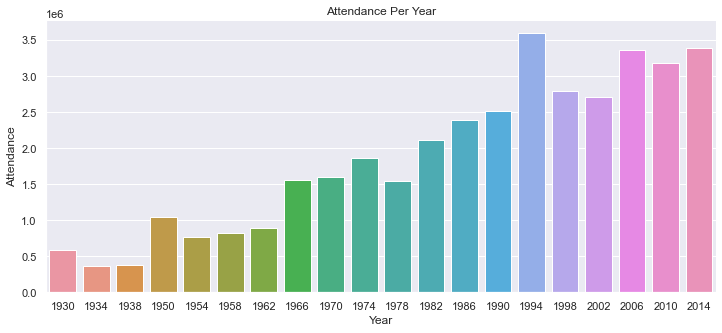

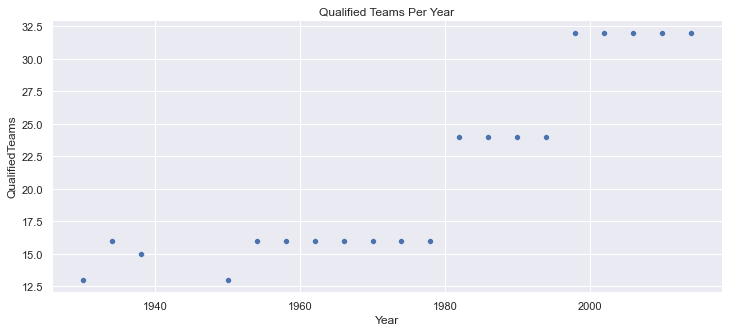

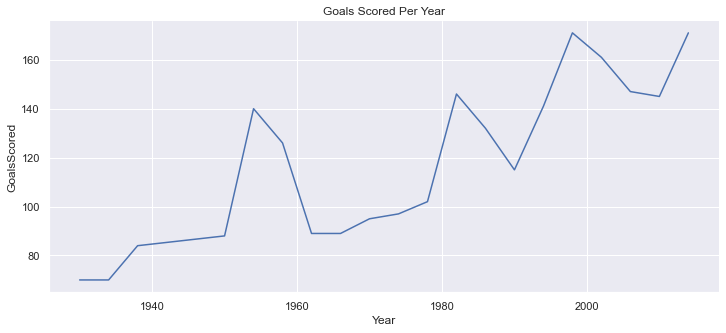

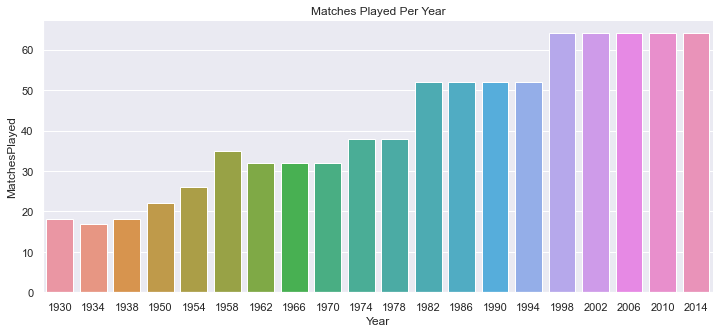

In [33]:
# Attendance per Year

fig, ax = plt.subplots(figsize = (12,5))
sns.despine(right = True)
g = sns.barplot(x = 'Year', y = 'Attendance', data = worldcup_data)
# plt.xticks(rotation = 80)
g.set_title('Attendance Per Year')

#==========================================

# Qualified Teams per Year

fig, ax = plt.subplots(figsize = (12,5))
sns.despine(right = True)
g = sns.scatterplot(x = 'Year', y = 'QualifiedTeams', data = worldcup_data)
# plt.xticks(rotation = 80)
g.set_title('Qualified Teams Per Year')

#==========================================

# Goals Scored during the competition per Year

fig, ax = plt.subplots(figsize = (12,5))
sns.despine(right = True)
g = sns.lineplot(x = 'Year', y = 'GoalsScored', data = worldcup_data)
# plt.xticks(rotation = 80)
g.set_title('Goals Scored Per Year')


#==========================================

# Matches Played Per Year

fig, ax = plt.subplots(figsize = (12,5))
sns.despine(right = True)
g = sns.barplot(x = 'Year', y = 'MatchesPlayed', data = worldcup_data)
# plt.xticks(rotation = 80)
g.set_title('Matches Played Per Year')

plt.show()

**Observations**: 
1. Attendance per world cup has been on a somewhat steady rise. However, all graphs show that there was no world cup in 1942 and 1946. [This article]() explains that it was because of World War II. However, there were unofficial tournaments that held. Explore [this article](https://theculturetrip.com/europe/germany/articles/why-wasnt-there-a-world-cup-in-1942-or-1946/) to know more.<br /><br />

2. Looks like there are 4 clusters of qualified. During the early years, there weren't as many qualified teams as now. I am led to believe that's because the conditions at the time were not very favorable to harbor as many countries. These conditions include but are not limited to: _few stadiums, low standards of living especially in developing countries, most countries could not afford the expenses of sending a team to represent them, not many people knew about and could play football_.<br /><br />

3. The number of goals scored does not have a very clear trend, as in the 50s, many goals were scored. This declined in the years between the 60s and 80s, and have been fluctuating since then.<br /><br />

4. The number of matches played per world cup have been increasing almost every 4 world cups. This is most probably due to increasing capacity to harbor more teams.

### Top Performant Countries in the World Cups

We want to explore the world cup dataframe to see how the teams have been performing accross the world cups - precisely, those teams which have been in the top 3 positions.

In [34]:
winners = worldcup_data['Winner'].value_counts()
winners

Brazil       5
Italy        4
Germany      4
Uruguay      2
Argentina    2
England      1
France       1
Spain        1
Name: Winner, dtype: int64

In [35]:
runners_up = worldcup_data['Runners-Up'].value_counts()
runners_up

Germany           4
Argentina         3
Netherlands       3
Czechoslovakia    2
Hungary           2
Brazil            2
Italy             2
Sweden            1
France            1
Name: Runners-Up, dtype: int64

In [36]:
thirds = worldcup_data['Third'].value_counts()
thirds

Germany        4
Brazil         2
Sweden         2
France         2
Poland         2
USA            1
Austria        1
Chile          1
Portugal       1
Italy          1
Croatia        1
Turkey         1
Netherlands    1
Name: Third, dtype: int64

In [37]:
performant_teams = pd.concat([winners, runners_up, thirds], axis=1)
performant_teams.fillna(0, inplace=True)
performant_teams = performant_teams.astype(int)
performant_teams

,Winner,Runners-Up,Third
Brazil,5,2,2
Italy,4,2,1
Germany,4,4,4
Uruguay,2,0,0
Argentina,2,3,0
England,1,0,0
France,1,1,2
Spain,1,0,0
Netherlands,0,3,1
Czechoslovakia,0,2,0


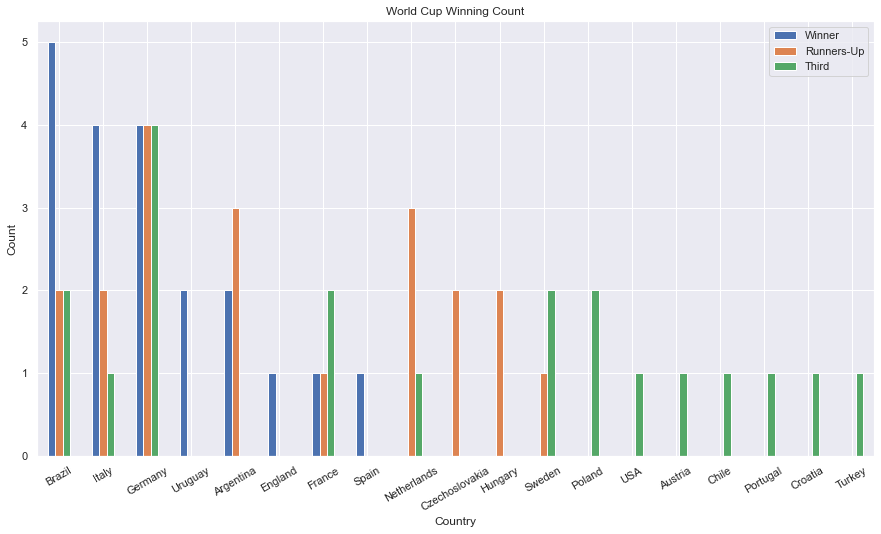

In [38]:
performant_teams[:].plot(kind="bar")

plt.xlabel('Country')
plt.ylabel('Count')
plt.title('World Cup Winning Count')
plt.xticks(rotation=30)
plt.show()

Brazil, Italy, and Germany have been dominating World Cups. A majority of the teams have only managed to finish third place and have never played a final.

### Goals per team per world cup

The aim here is to see how the countries have been scoring over the course of their participations in the World Cups.

In [39]:
home_goals = worldcup_matches_data.groupby(['Year', 'Home Team Name'])['Home Team Goals'].sum()
home_goals

Year  Home Team Name
1930  Argentina         16.0
      Brazil             4.0
      Chile              4.0
      France             4.0
      Paraguay           1.0
                        ... 
2014  Russia             1.0
      Spain              1.0
      Switzerland        4.0
      USA                2.0
      Uruguay            3.0
Name: Home Team Goals, Length: 366, dtype: float64

In [40]:
away_goals = worldcup_matches_data.groupby(['Year', 'Away Team Name'])['Away Team Goals'].sum()
away_goals

Year  Away Team Name
1930  Argentina         2.0
      Belgium           0.0
      Bolivia           0.0
      Brazil            1.0
      Chile             1.0
                       ... 
2014  Russia            1.0
      Spain             3.0
      Switzerland       3.0
      USA               3.0
      Uruguay           1.0
Name: Away Team Goals, Length: 411, dtype: float64

In [41]:
team_goals = pd.concat([home_goals, away_goals], axis=1)
team_goals.fillna(0, inplace=True)
team_goals['Goals'] = team_goals['Home Team Goals'] + team_goals['Away Team Goals']
team_goals

Home Team Goals  Away Team Goals  Goals
Year                                                     
1930 Argentina               16.0              2.0   18.0
     Belgium                  0.0              0.0    0.0
     Bolivia                  0.0              0.0    0.0
     Brazil                   4.0              1.0    5.0
     Chile                    4.0              1.0    5.0
...                           ...              ...    ...
2014 Russia                   1.0              1.0    2.0
     Spain                    1.0              3.0    4.0
     Switzerland              4.0              3.0    7.0
     USA                      2.0              3.0    5.0
     Uruguay                  3.0              1.0    4.0

[427 rows x 3 columns]

In [42]:
team_goals = team_goals.reset_index()

In [43]:
team_goals.columns = ['Year', 'Country', 'Home Team Goals', 'Away Team Goals', 'Goals']
team_goals = team_goals.sort_values(by = ['Country', 'Year'], ascending = True)
team_goals

,Year,Country,Home Team Goals,Away Team Goals,Goals
170,1982,Algeria,3.0,2.0,5.0
194,1986,Algeria,1.0,0.0,1.0
363,2010,Algeria,0.0,0.0,0.0
395,2014,Algeria,1.0,6.0,7.0
330,2006,Angola,0.0,1.0,1.0
...,...,...,...,...,...
151,1974,Yugoslavia,9.0,3.0,12.0
193,1982,Yugoslavia,0.0,2.0,2.0
241,1990,Yugoslavia,5.0,3.0,8.0
297,1998,Yugoslavia,1.0,4.0,5.0


Let us see how Cameroon has been scoring in the WCs they've played.

In [44]:
cmr_goals = team_goals[team_goals.Country == 'Cameroon']

cmr_goals

,Year,Country,Home Team Goals,Away Team Goals,Goals
175,1982,Cameroon,0.0,1.0,1.0
222,1990,Cameroon,4.0,3.0,7.0
247,1994,Cameroon,2.0,1.0,3.0
271,1998,Cameroon,1.0,1.0,2.0
301,2002,Cameroon,1.0,1.0,2.0
367,2010,Cameroon,2.0,0.0,2.0
401,2014,Cameroon,1.0,0.0,1.0


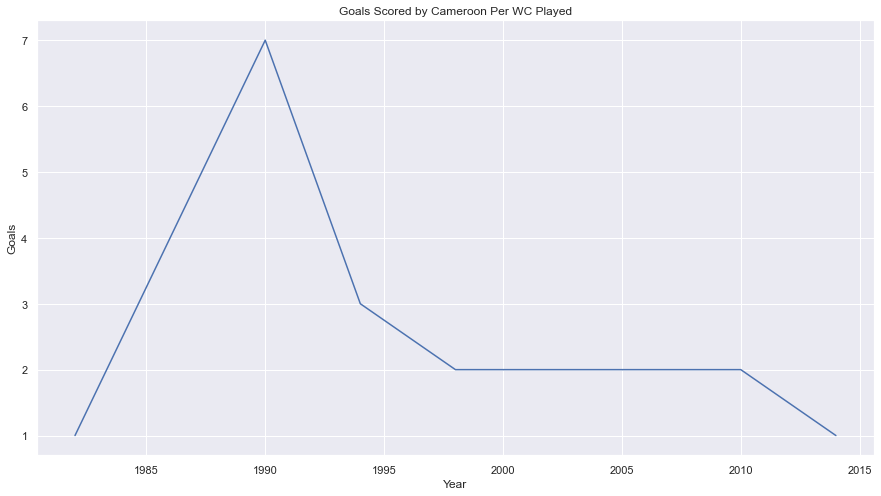

In [45]:
sns.despine(right = True)
g = sns.lineplot(x = 'Year', y = 'Goals', data = cmr_goals)
g.set_title('Goals Scored by Cameroon Per WC Played')
plt.show()

It's interesting to see that Cameroon has always scored at least a goal when they played a WC. They performed best in 1990 when they were knocked out by England at the Quater Final. [Read more here](https://www.fifa.com/tournaments/mens/worldcup/1990italy/match-center). Since then, the performances have been on a decline.

### Number of Goals Per Country for all the world cups they've played

We want to see how many goals each team has scored throughout their World cup appearances.

In [46]:
goals = team_goals.groupby(['Country'])['Goals'].sum()

goals

Country
Algeria                  13.0
Angola                    1.0
Argentina               131.0
Australia                11.0
Austria                  43.0
                        ...  
United Arab Emirates      2.0
Uruguay                  80.0
Wales                     4.0
Yugoslavia               60.0
Zaire                     0.0
Name: Goals, Length: 82, dtype: float64

In [47]:
goals = goals.sort_values(ascending=False)

goals

Country
Germany                224.0
Brazil                 221.0
Argentina              131.0
Italy                  128.0
France                 106.0
                       ...  
Dutch East Indies        0.0
Canada                   0.0
Trinidad and Tobago      0.0
China PR                 0.0
Zaire                    0.0
Name: Goals, Length: 82, dtype: float64

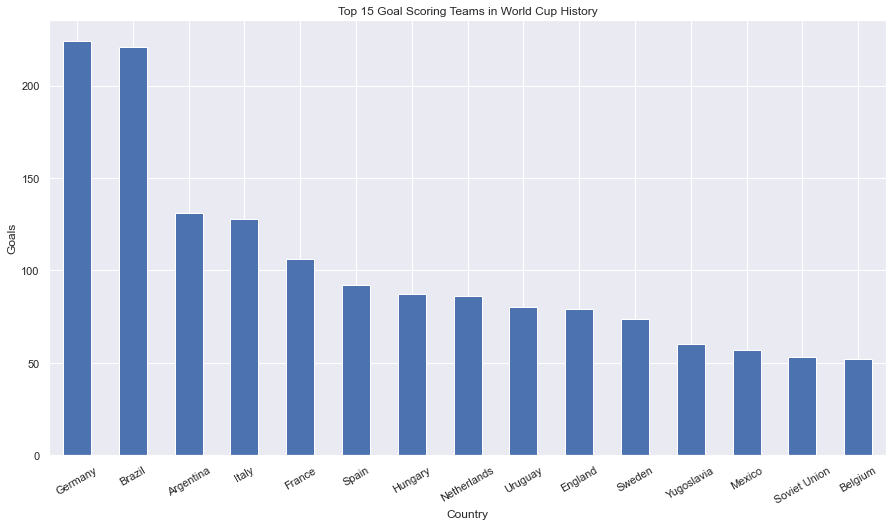

In [48]:
goals[:15].plot(kind="bar")

plt.xlabel('Country')
plt.ylabel('Goals')
plt.title('Top 15 Goal Scoring Teams in World Cup History')
plt.xticks(rotation=30)
plt.show()

Germany lead the score board with just a few goals above Brazil. The other teams have had decent goal-scoring streaks too.

### Frequency of Goals Scored During a world cup

Our aim is to see how often goals are scored in a world cup. i.e. which is the most like number of goals to be scored during a world cup match.

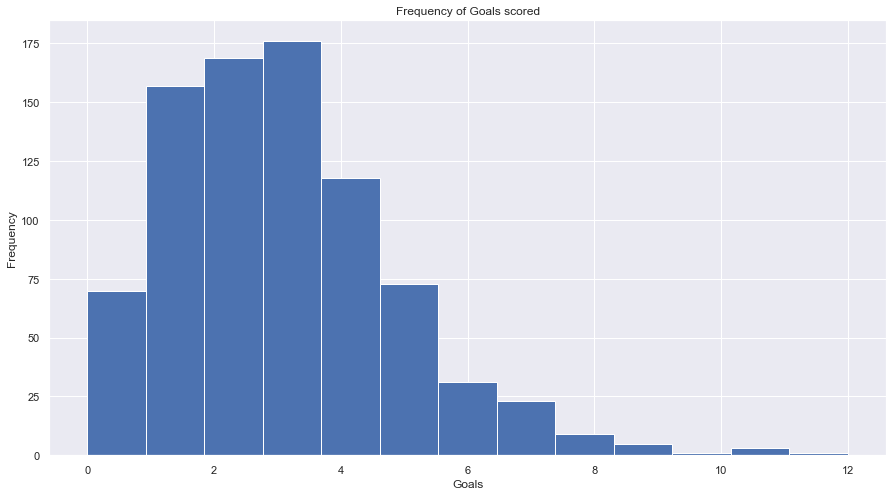

In [49]:
worldcup_matches_data.Goals.plot(kind = 'hist', bins = 13)
plt.xlabel('Goals')
plt.ylabel('Frequency')
plt.title('Frequency of Goals scored')
plt.show()

Most WC matches involve 0 to 5 goals. A few matches have up to 6 to 9 goals. Some have had up to 11. There haven't been any more than these.

### DISTRIBUTION OF HOME TEAM AND AWAY TEAM GOALS

We want to see how the teams have been scoring based on whether they are playing at home or away

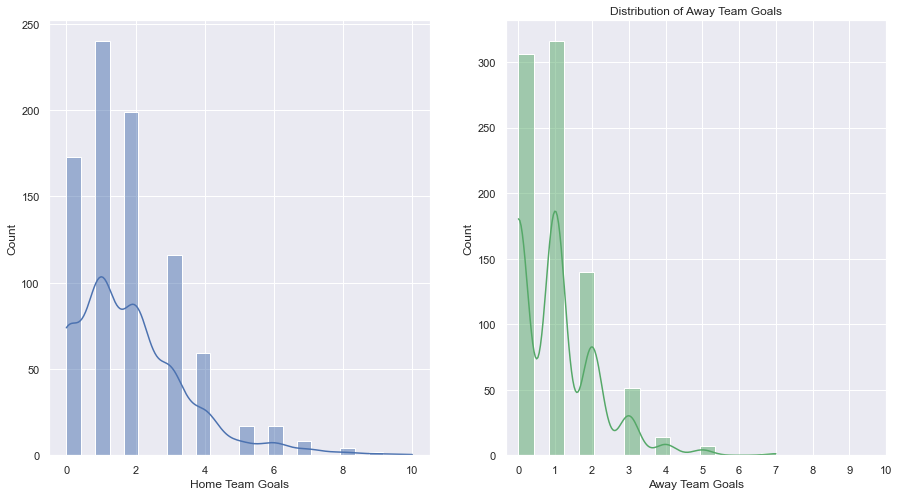

In [50]:
fig, (ax1, ax2) = plt.subplots(ncols=2)

sns.histplot(worldcup_matches_data["Home Team Goals"], color="b", kde=True, ax=ax1)
plt.xticks(np.arange(0,11,1))
plt.title("Distribution of Home Team Goals")

sns.histplot(worldcup_matches_data["Away Team Goals"], color="g", kde=True, ax=ax2)
plt.xticks(np.arange(0,11,1))
plt.title("Distribution of Away Team Goals")

plt.show()

At home, most teams manage to score at 1 to 3 goals. Some (a small number) managed to score more than 8. While, away, most teams struggle to even score a goal. Those which do rarely score more than 3. No team has succeeded to score more than 7 goals while playing away.

### Match Outcome based on whether is playing at home or away

This helps us to understand how likely it is for a team to win a match when they are playing at home or away

In [51]:
match_outcome = worldcup_matches_data['Match Outcome'].value_counts()
match_outcome

Home Team Win    479
Draw             186
Away Team Win    171
Name: Match Outcome, dtype: int64

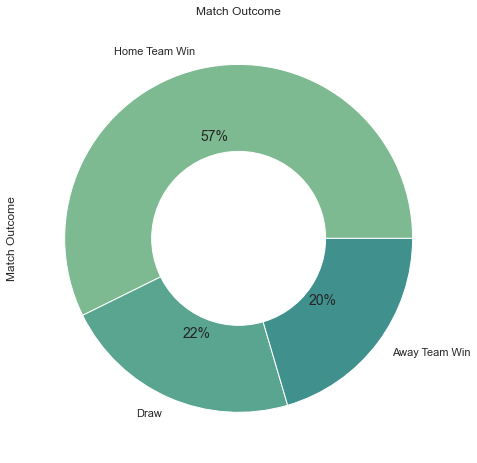

In [52]:
match_outcome.plot.pie(autopct="%1.0f%%", colors = sns.color_palette("crest"))
middle_circle = plt.Circle((0,0), 0.5, color='white')
plt.gca().add_artist(middle_circle)
plt.title("Match Outcome")
plt.show()

It is obvious from the chart that it is more likely for a team to win the match if they're playing at home. It is even more likely for a team to draw than for it to win a match when it is playing away.

In [53]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "djotchuang/fifa-world-cup-analysis" on https://jovian.ai/
[jovian] Committed successfully! https://jovian.ai/djotchuang/fifa-world-cup-analysis


'https://jovian.ai/djotchuang/fifa-world-cup-analysis'

## Asking and Answering Questions

In this section, we're going to answer some questions based on our findings in the EDA and visualizations. We will plot some more graphs were need be.

### Q1: Which players have played the highest number of World Cup Matches?

Here, we will use the world cup data to know the top 10 players with the highest number of WC match appearances. Appearance here means they were in the match sheet, even if they did not play for a minute.

In [54]:
worldcup_players.head()

,RoundID,MatchID,Team Initials,Coach Name,Line-up,Shirt Number,Player Name,Position,Event
0,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Alex THEPOT,GK,NaN
1,201,1096,MEX,LUQUE Juan (MEX),S,0,Oscar BONFIGLIO,GK,NaN
2,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Marcel LANGILLER,NaN,G40'
3,201,1096,MEX,LUQUE Juan (MEX),S,0,Juan CARRENO,NaN,G70'
4,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Ernest LIBERATI,NaN,NaN


In [55]:
matches_played = worldcup_players['Player Name'].value_counts().reset_index()

matches_played.head()

,index,Player Name
0,RONALDO,33
1,KLOSE,32
2,OSCAR,28
3,M�LLER,28
4,JULIO CESAR,26


In [56]:
import warnings

warnings.filterwarnings("ignore", message="Glyph 65533 missing from current font.")

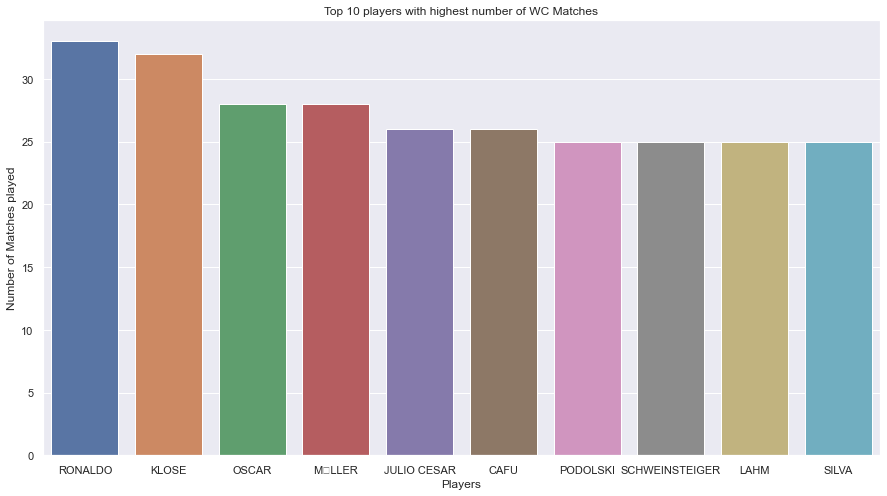

In [57]:
sns.barplot(data=matches_played.head(10), x='index', y = 'Player Name')
plt.xlabel("Players")
plt.ylabel("Number of Matches played")
plt.title("Top 10 players with highest number of WC Matches")
plt.show()

Ronaldo has played more matches than any other player until WC 2014.

### Q2: Which players have the highest number of world cup appearances?

We want to know how many times each player has been selected for a WC and who has the highest number of selections

In [58]:
worldcup_matches_data.columns

Index(['Year', 'Stage', 'Stadium', 'City', 'Home Team Name', 'Home Team Goals',
       'Away Team Goals', 'Away Team Name', 'Win conditions', 'Attendance',
       'Half-time Home Goals', 'Half-time Away Goals', 'Referee',
       'Assistant 1', 'Assistant 2', 'RoundID', 'MatchID',
       'Home Team Initials', 'Away Team Initials', 'Date', 'Time', 'Goals',
       'Match Outcome'],
      dtype='object')

In [59]:
appearance = worldcup_players.merge(worldcup_matches_data[['Year', 'MatchID']], on='MatchID')

appearance.head()

,RoundID,MatchID,Team Initials,Coach Name,Line-up,Shirt Number,Player Name,Position,Event,Year
0,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Alex THEPOT,GK,NaN,1930
1,201,1096,MEX,LUQUE Juan (MEX),S,0,Oscar BONFIGLIO,GK,NaN,1930
2,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Marcel LANGILLER,NaN,G40',1930
3,201,1096,MEX,LUQUE Juan (MEX),S,0,Juan CARRENO,NaN,G70',1930
4,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Ernest LIBERATI,NaN,NaN,1930


In [60]:
matches = appearance[['Player Name', 'Year']].sort_values(by='Year')

matches.drop_duplicates(keep = 'first', inplace = True)

matches

,Player Name,Year
0,Alex THEPOT,1930
454,Delfin BENITEZ CACERES,1930
455,Louis VERSYP,1930
456,Eusebio DIAZ,1930
457,Pierre BRAINE,1930
...,...,...
34410,SMALLING,2014
34411,CASSANO,2014
34413,CERCI,2014
34414,MILNER,2014


In [61]:
WC_appearances = matches['Player Name'].value_counts().reset_index()

WC_appearances.head()

,index,Player Name
0,RONALDO,6
1,Antonio CARBAJAL,5
2,EDU,4
3,Pedro ROCHA,4
4,SONG,4


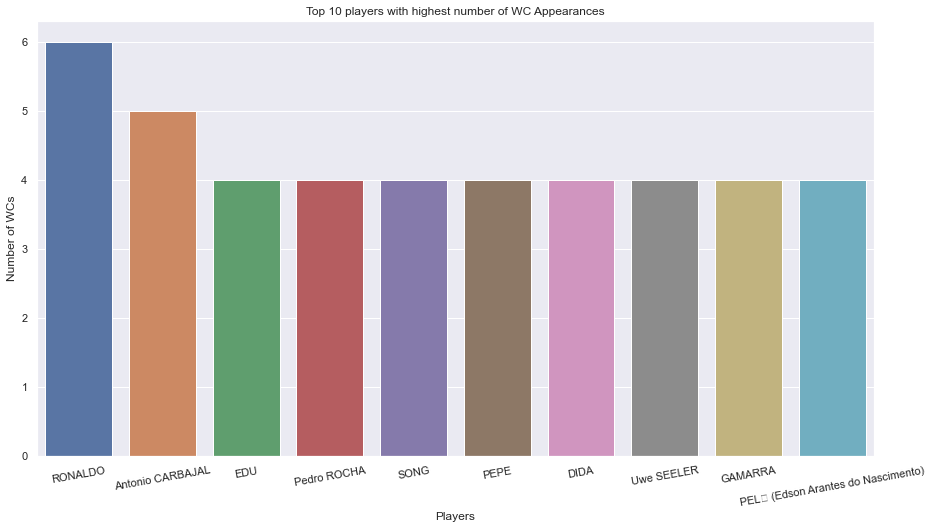

In [62]:
sns.barplot(data=WC_appearances.head(10), x='index', y = 'Player Name')
plt.xlabel("Players")
plt.ylabel("Number of WCs")
plt.title("Top 10 players with highest number of WC Appearances")
plt.xticks(rotation=10)
plt.show()

Ronaldo has played in more WCs than any other player, followed by Antonio Carbajal. The others, however, all have 4 appearances.

### Q3: Which coach has won the highest number of WC Matches?

In [63]:
wc_matches = worldcup_players[['MatchID', 'Team Initials', 'Coach Name']
                             ].merge(worldcup_matches_data[['Home Team Initials', 
                                                            'Away Team Initials', 
                                                            'Match Outcome', 'MatchID']
                                                          ], on='MatchID')

wc_matches.head()

,MatchID,Team Initials,Coach Name,Home Team Initials,Away Team Initials,Match Outcome
0,1096,FRA,CAUDRON Raoul (FRA),FRA,MEX,Home Team Win
1,1096,MEX,LUQUE Juan (MEX),FRA,MEX,Home Team Win
2,1096,FRA,CAUDRON Raoul (FRA),FRA,MEX,Home Team Win
3,1096,MEX,LUQUE Juan (MEX),FRA,MEX,Home Team Win
4,1096,FRA,CAUDRON Raoul (FRA),FRA,MEX,Home Team Win


In [64]:
home_win_df = wc_matches[['Coach Name', 'Home Team Initials', 'MatchID']
                        ][(wc_matches['Match Outcome'] == 'Home Team Win') & 
                          (wc_matches['Team Initials'] == wc_matches['Home Team Initials'])]

home_win_df.head()

,Coach Name,Home Team Initials,MatchID
0,CAUDRON Raoul (FRA),FRA,1096
2,CAUDRON Raoul (FRA),FRA,1096
4,CAUDRON Raoul (FRA),FRA,1096
6,CAUDRON Raoul (FRA),FRA,1096
8,CAUDRON Raoul (FRA),FRA,1096


In [65]:
away_win_df = wc_matches[['Coach Name', 'Away Team Initials', 'MatchID']
                        ][(wc_matches['Match Outcome'] == 'Away Team Win') & 
                          (wc_matches['Team Initials'] == wc_matches['Away Team Initials'])]

away_win_df.head()

,Coach Name,Away Team Initials,MatchID
4298,HERBERGER Sepp (FRG),FRG,1323
4300,HERBERGER Sepp (FRG),FRG,1323
4302,HERBERGER Sepp (FRG),FRG,1323
4304,HERBERGER Sepp (FRG),FRG,1323
4306,HERBERGER Sepp (FRG),FRG,1323


In [66]:
coach_df = home_win_df.merge(away_win_df, on='Coach Name')

coach_df.head()

,Coach Name,Home Team Initials,MatchID_x,Away Team Initials,MatchID_y
0,HERBERGER Sepp (FRG),FRG,1283,FRG,1323
1,HERBERGER Sepp (FRG),FRG,1283,FRG,1323
2,HERBERGER Sepp (FRG),FRG,1283,FRG,1323
3,HERBERGER Sepp (FRG),FRG,1283,FRG,1323
4,HERBERGER Sepp (FRG),FRG,1283,FRG,1323


In [67]:
coach_df.sort_values(by='Coach Name')

,Coach Name,Home Team Initials,MatchID_x,Away Team Initials,MatchID_y
166541,ARAGONES Luis (ESP),ESP,97410031,ESP,97410047
166176,ARAGONES Luis (ESP),ESP,97410015,ESP,97410047
166175,ARAGONES Luis (ESP),ESP,97410015,ESP,97410047
166174,ARAGONES Luis (ESP),ESP,97410015,ESP,97410047
166173,ARAGONES Luis (ESP),ESP,97410015,ESP,97410047
...,...,...,...,...,...
28980,ZAGALLO Mario (BRA),BRA,1764,BRA,1945
28981,ZAGALLO Mario (BRA),BRA,1764,BRA,1945
28982,ZAGALLO Mario (BRA),BRA,1764,BRA,1945
28984,ZAGALLO Mario (BRA),BRA,1764,BRA,1945


In [68]:
coach_df.drop_duplicates(keep = 'first', inplace = True)

coach_df

,Coach Name,Home Team Initials,MatchID_x,Away Team Initials,MatchID_y
0,HERBERGER Sepp (FRG),FRG,1283,FRG,1323
484,HERBERGER Sepp (FRG),FRG,1284,FRG,1323
968,HERBERGER Sepp (FRG),FRG,1285,FRG,1323
1452,HERBERGER Sepp (FRG),FRG,1233,FRG,1323
1936,HERBERGER Sepp (FRG),FRG,1278,FRG,1323
...,...,...,...,...,...
226628,Louis VAN GAAL (NED),NED,300186470,NED,300186478
226651,Louis VAN GAAL (NED),NED,300186470,NED,300186502
228721,Louis VAN GAAL (NED),NED,300186508,NED,300186510
228744,Louis VAN GAAL (NED),NED,300186508,NED,300186478


In [69]:
coach_matches_won = coach_df['Coach Name'].value_counts().reset_index()

coach_matches_won.head() 

,index,Coach Name
0,SCHOEN Helmut (FRG),48
1,SCOLARI Luiz Felipe (BRA),45
2,LOEW Joachim (GER),30
3,PARREIRA Carlos Alberto (BRA),24
4,ZAGALLO Mario (BRA),22


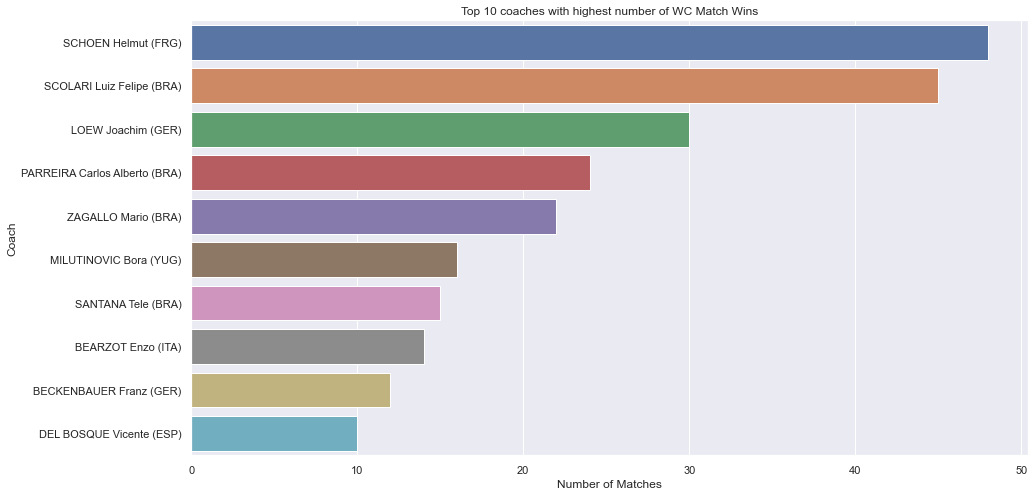

In [70]:
sns.barplot(data=coach_matches_won.head(10), x='Coach Name', y = 'index')
plt.ylabel("Coach")
plt.xlabel("Number of Matches")
plt.title("Top 10 coaches with highest number of WC Match Wins")
plt.show()

This [wikipedia article](https://en.wikipedia.org/wiki/List_of_FIFA_country_codes) shows the country initials and their full names. **_Note: Some of the initials in this dataset are obsolete. The article highlights them._**

Germany and Brazil (most especially) have dominated WCs for years now. Their coaches have seen glory more than any other coaches.

### Q4: Which is the most used Referee in the knockout stages?

The aim is to know the referee who has arbitrated most during the knockout stages. i.e. The stages after the Group Stage.

In [71]:
stage_data = worldcup_matches_data[['Stage', 'Referee', 'MatchID']]

stage_data

,Stage,Referee,MatchID
0,Group 1,LOMBARDI Domingo (URU),1096
1,Group 4,MACIAS Jose (ARG),1090
2,Group 2,TEJADA Anibal (URU),1093
3,Group 3,WARNKEN Alberto (CHI),1098
4,Group 1,REGO Gilberto (BRA),1085
...,...,...,...
831,Quarter-finals,Nicola RIZZOLI (ITA),300186504
832,Round of 16,PROENCA Pedro (POR),300186508
833,Round of 16,Ben WILLIAMS (AUS),300186459
834,Round of 16,ERIKSSON Jonas (SWE),300186503


In [72]:
knockout_df = stage_data[~stage_data.Stage.str.contains('Group')]

knockout_df

,Stage,Referee,MatchID
15,Semi-finals,LANGENUS Jean (BEL),1088
16,Semi-finals,REGO Gilberto (BRA),1101
17,Final,LANGENUS Jean (BEL),1087
18,Preliminary round,VAN MOORSEL Johannes (NED),1104
19,Preliminary round,BARLASSINA Rinaldo (ITA),1119
...,...,...,...
831,Quarter-finals,Nicola RIZZOLI (ITA),300186504
832,Round of 16,PROENCA Pedro (POR),300186508
833,Round of 16,Ben WILLIAMS (AUS),300186459
834,Round of 16,ERIKSSON Jonas (SWE),300186503


In [73]:
referee_df = knockout_df.Referee.value_counts().reset_index()

referee_df

,index,Referee
0,LANGENUS Jean (BEL),5
1,EKLIND Ivan (SWE),5
2,BARLASSINA Rinaldo (ITA),4
3,QUINIOU Joel (FRA),4
4,YAMASAKI MALDONADO Arturo (MEX),3
...,...,...
139,CORVER Charles (NED),1
140,CARDELLINO DE SAN VICENTE Juan (URU),1
141,GONELLA Sergio (ITA),1
142,KLEIN Abraham (ISR),1


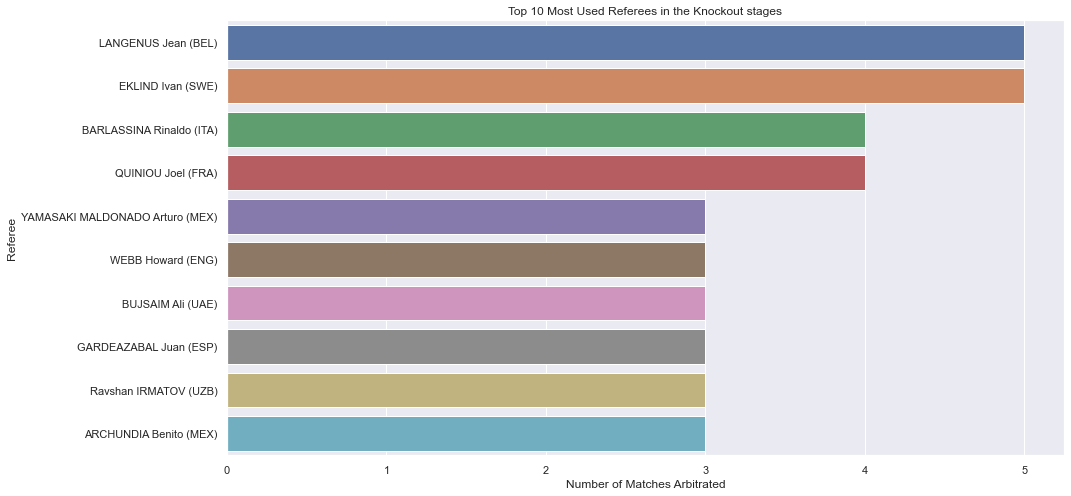

In [74]:
sns.barplot(data=referee_df.head(10), x='Referee', y = 'index')
plt.ylabel("Referee")
plt.xlabel("Number of Matches Arbitrated")
plt.title("Top 10 Most Used Referees in the Knockout stages")
plt.show()

There isn't much gap in the data. This shows that the selection for referees during these stages has been fair.

### Q5: Which Countries Hosted the World Cup and Won?

We want to know those countries who were host countries, and succeeding to win the tournament at home.

In [75]:
winning_hosts = worldcup_data[worldcup_data['Winner'] == worldcup_data['Country']][['Year', 'Country']]

winning_hosts

,Year,Country
0,1930,Uruguay
1,1934,Italy
7,1966,England
9,1974,Germany
10,1978,Argentina
15,1998,France


Only six teams have succeeded to do that, and none has been able to do it more than once.

### Q6: Which Matches had the Highest Attendance?

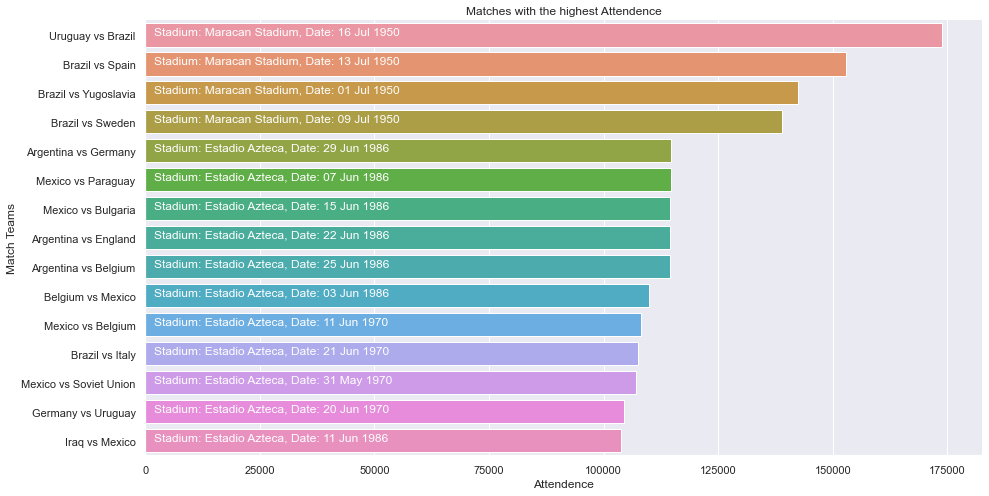

In [76]:
top15 = worldcup_matches_data.sort_values(by = 'Attendance', ascending = False)[:15]
top15['vs'] = top15['Home Team Name'] + " vs " + top15['Away Team Name']

ax = sns.barplot(y = top15['vs'], x = top15['Attendance'])
sns.despine(right = True)

plt.ylabel('Match Teams')
plt.xlabel('Attendence')
plt.title('Matches with the highest Attendence')

for i, s in enumerate("Stadium: " + top15['Stadium'] +", Date: " + top15['Date']):
    ax.text(2000, i, s, fontsize = 12, color = 'white')
plt.show()

The matches in the 1950s dominate the chart. This is logical, as there hadn't been any world cup for 12 years. I'm sure the fans were very eager to pull out this time.

### Q7: Which stadiums are most likely to be populated if there is a match?

By obtaining the average attendance in each stadium, we will be able to know which stadiums are most likely to get populated when there is a match.

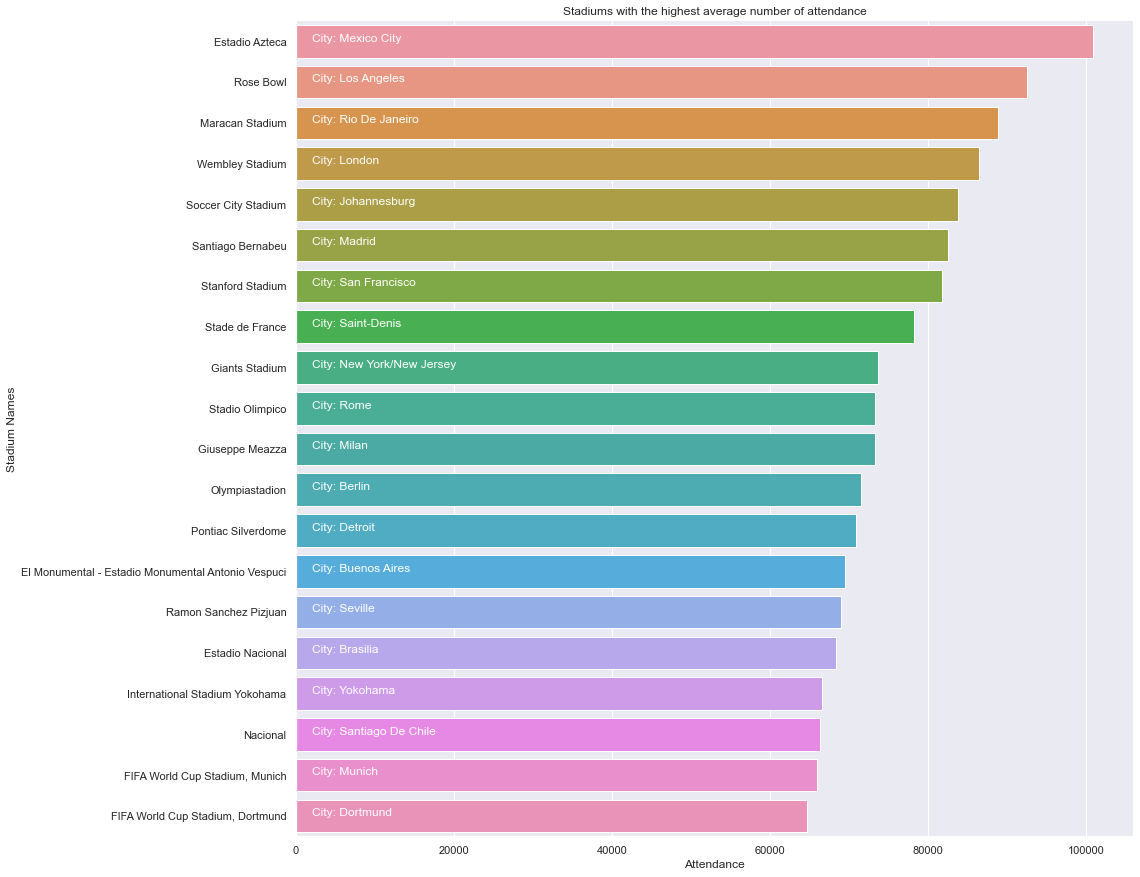

In [77]:
worldcup_matches_data['Year'] = worldcup_matches_data['Year'].astype(int)

std = worldcup_matches_data.groupby(['Stadium', 'City'])['Attendance'
                                          ].mean().reset_index().sort_values(by = 'Attendance', 
                                                                             ascending =False)

top20 = std[:20]

plt.figure(figsize = (15,15))

ax = sns.barplot(y = top20['Stadium'], x = top20['Attendance'])
sns.despine(right = True)

plt.ylabel('Stadium Names')
plt.xlabel('Attendance')
plt.title('Stadiums with the highest average number of attendance')
for i, s in enumerate("City: " + top20['City']):
        ax.text(2000, i, s, fontsize = 12, color = 'white')
        
plt.show()

Historically, Estadio Azieca has pulled more crowd than any other stadium. We can't say with absolute certainty that it could be the case today, but there is a high likelihood that it gathers more crowd if there is a match.

In [78]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "djotchuang/fifa-world-cup-analysis" on https://jovian.ai/
[jovian] Committed successfully! https://jovian.ai/djotchuang/fifa-world-cup-analysis


'https://jovian.ai/djotchuang/fifa-world-cup-analysis'

## Inferences and Conclusion

In this notebook, we were able to clean, explore, visualize, analyze, and answer interesting questions using the [Fifa World Cup Dataset](https://www.kaggle.com/abecklas/fifa-world-cup).

> **Here are a few insights**:

> - The FIFA World Cup started in 1930 and was hosted by Uruguay which went on to win the cup. <br /><br />
> - Brazil has won the highest number of WCs(5), followed by Germany and Italy with 4 each. Uruguay and Argentina have 2 cups each, followed by England, France and Spain which have each won the cup once.<br /><br />
> - SCHOEN Helmut is the coach who has won the highest number of matches throughout the World cups (48). He used to coach the then West Germany. <br /><br />
> - Belgian referee, LANGENUS Jean, and Swedish referee, EKLIND Ivan, have refereed the highest number of matches (5) during the knockout stages.<br /><br />
> - Germany has scored the highest number of goals throughout WC history (224), followed by Brazil (221), and Argentina (131).<br /><br />
> - Brazilian Ronaldo has appeared in more World Cup tournaments and has played more matches than any other player.<br /><br />
> - Only Uruguay (1930), Italy (1934), England (1966), Germany(1974), Argentina (1978), France (1998) have succeeded to win the World Cup at home.<br /><br />
> - Throughout WC history, it is more likely to win a match while playing at home than away. It is even more likely that you draw while playing away than that you win.<br /><br />
> - Most World Cup matches have involved 1 to 5 goals.

In [79]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "djotchuang/fifa-world-cup-analysis" on https://jovian.ai/
[jovian] Committed successfully! https://jovian.ai/djotchuang/fifa-world-cup-analysis


'https://jovian.ai/djotchuang/fifa-world-cup-analysis'

## Future Work

- There is still a lot that can be done with this dataset. We could do some more in-debt analysis to answer more questions like: 
> 1. Which players have played the highest number of minutes in WC history.
> 2. Which players have influenced the game when substituted. i.e. They either scored, or provided an assist which resulted in their team winning.
> 3. Players who have been substituted the most.Likewise, players with the most starts.

and more...

- We could also use a more statistically friendly approach to know the most performant teams in WC history. That is, by considering performance based on the number of games played, previous history of the team (how many times they've qualified, the stages they've played in at previous WCs, etc). Performance here refers to number of goals scored, highest stage attained, number matches won, etc.
<br />

- The data ends at 2014, but there has been one more world cup after then which was in 2018, and was won by France. So we could look out for that data and add it to this one to make our analysis complete.

## References

1. Zero to Pandas Data Analysis Course on Jovian.ai: https://jovian.ml/learn/data-analysis-with-python-zero-to-pandas
2. FIFA World Cup dataset: https://www.kaggle.com/abecklas/fifa-world-cup
3. Pandas Documentation: https://pandas.pydata.org/docs/
4. Matplotlib Documentation: https://matplotlib.org/
5. Seaborn Documentation: https://seaborn.pydata.org/
6. Fifa Teams and their Initials: https://en.wikipedia.org/wiki/List_of_FIFA_country_codes
7. Fifa World Cup Record and Statistics: https://en.wikipedia.org/wiki/List_of_FIFA_World_Cup_records_and_statistics

In [82]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "djotchuang/fifa-world-cup-analysis" on https://jovian.ai/
[jovian] Committed successfully! https://jovian.ai/djotchuang/fifa-world-cup-analysis


'https://jovian.ai/djotchuang/fifa-world-cup-analysis'